# Machine Learning Assignment


# Neural Network

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image
from IPython.display import display
import torchvision.transforms as visiontrans

In [134]:
def train_nn(hidden_layers):
    model = nn.Sequential(*hidden_layers)

    trns_img = visiontrans.Compose([
    visiontrans.Grayscale(),
    visiontrans.ToTensor()])

    input_pixels = trns_img(Image.open("bird038.png"))
 
    flattened_pxl = input_pixels.flatten()
    mean_pxl = input_pixels.mean()
    std_pxl = input_pixels.std()
    std_flattened_pxl = (flattened_pxl - mean_pxl) / std_pxl 

    x_coordinates = torch.arange(97).float()
    y_coordinates = torch.arange(128).float()
    xx, yy = torch.meshgrid(x_coordinates, y_coordinates)
    coordinates = torch.stack((xx, yy), dim=-1).view(-1, 2)
    
    coord_mean = coordinates.mean(dim=0)
    coord_std = coordinates.std(dim=0)
    custom_standardized_axis = (coordinates - coord_mean) / coord_std
    
    custom_standardized_axis = custom_standardized_axis.numpy()
    std_flattened_pxl = std_flattened_pxl.numpy()

    custom_data = list(zip(custom_standardized_axis, std_flattened_pxl))
    np.random.shuffle(custom_data)
    batch_size = 64
    num_batches = len(custom_data) // batch_size

    model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

    adam_optim = optim.Adam(model.parameters(), lr=0.0001)
    loss_fn = nn.MSELoss()
    step_size = 100 

    
    def reduce_learning_rate(optimizer, epoch):
        learning_rate = 0.0001 * (0.5 ** (epoch // step_size))
        for param_group in optimizer.param_groups:
            param_group['lr'] = learning_rate

    epoch_losses = []

    epochs = 300
    for epoch in range(epochs):
        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = (i + 1) * batch_size
            batch_data = custom_data[start_idx:end_idx]
            X_batch, y_batch = zip(*batch_data)
            X_batch = torch.tensor(X_batch).float()
            y_batch = torch.tensor(y_batch).float()
            adam_optim.zero_grad()
            pred = model(X_batch).squeeze()
            loss = loss_fn(pred, y_batch)
            loss.backward()
            adam_optim.step()

        epoch_losses.append(loss.item())
        reduce_learning_rate(adam_optim, epoch)  

    with torch.set_grad_enabled(False):
        model_output = model(torch.tensor(custom_standardized_axis).float()).cpu()
        processed_image = ((model_output * std_pxl + mean_pxl).clamp(0., 1.) * 255).numpy().astype(np.uint8)
        final_image = Image.fromarray(processed_image.reshape(97, 128))
        
    plt.figure(figsize=(12, 8))
    plt.plot(range(1, 301), epoch_losses, color='black', marker='s', markersize=5, linestyle='-', label='Train Loss')
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.title('Loss function v/s Epochs')
    plt.legend()
    plt.show()

    display(final_image)


-------------1A Solution--------------------



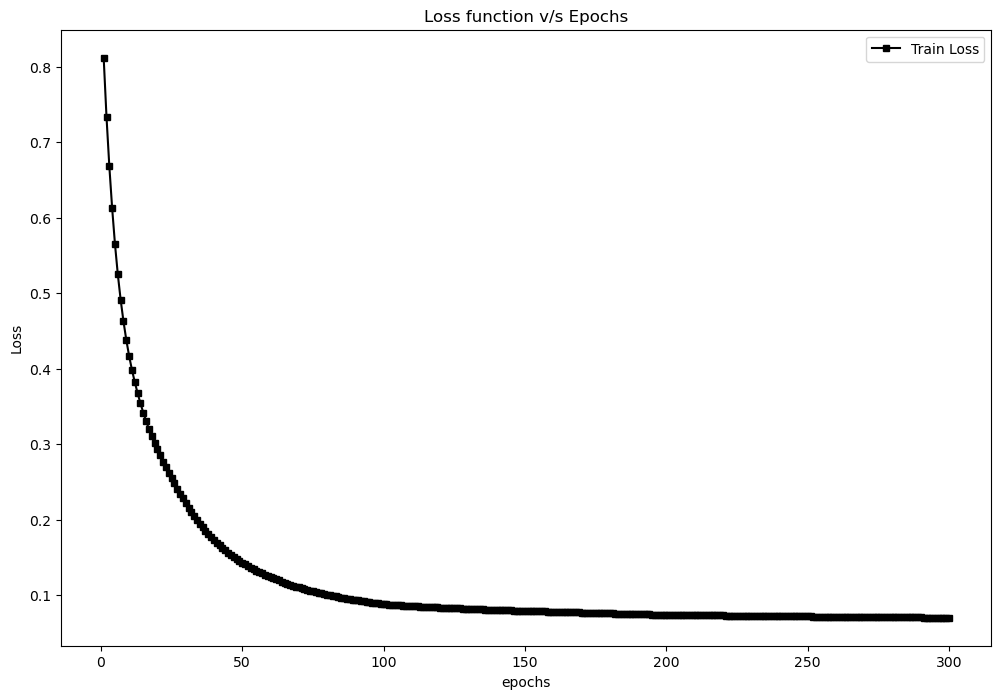

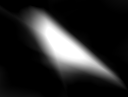

In [135]:
hidden_layers = [
    torch.nn.Linear(2,128),
    torch.nn.ReLU(),
    torch.nn.Linear(128,1)
]

print()
print("-------------1A Solution--------------------")
print()

train_nn(hidden_layers)


-------------1B Solution--------------------



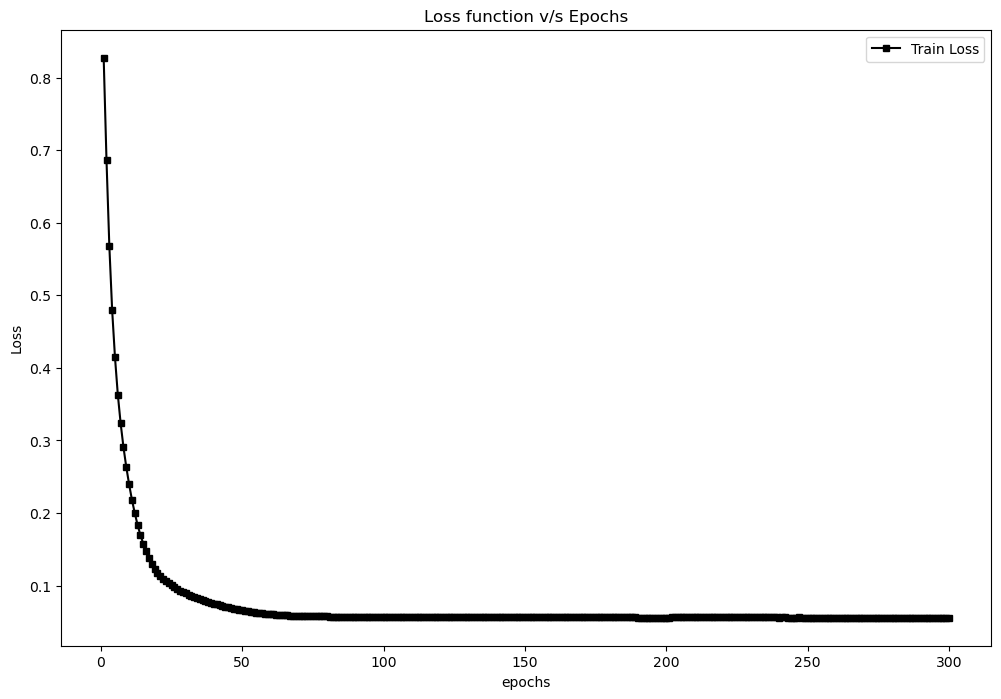

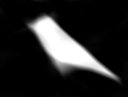

In [136]:
hidden_layers = [
    nn.Linear(2,32),
    nn.ReLU(),
    nn.Linear(32,128),
    nn.ReLU(),
    nn.Linear(128,1)
]

print()
print("-------------1B Solution--------------------")
print()

train_nn(hidden_layers)



-------------1C Solution--------------------



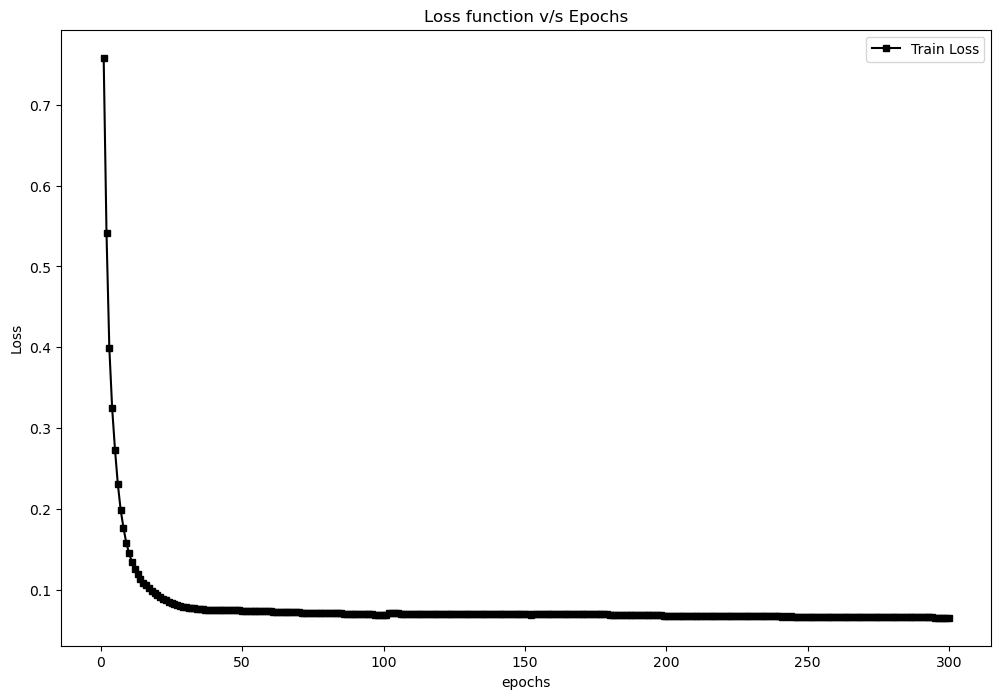

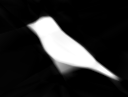

In [137]:
hidden_layers = [
    nn.Linear(2,32),
    nn.ReLU(),
    nn.Linear(32,64),
    nn.ReLU(),
    nn.Linear(64,128),
    nn.ReLU(),
    nn.Linear(128,1)
]

print()
print("-------------1C Solution--------------------")
print()

train_nn(hidden_layers)


-------------1D Solution--------------------



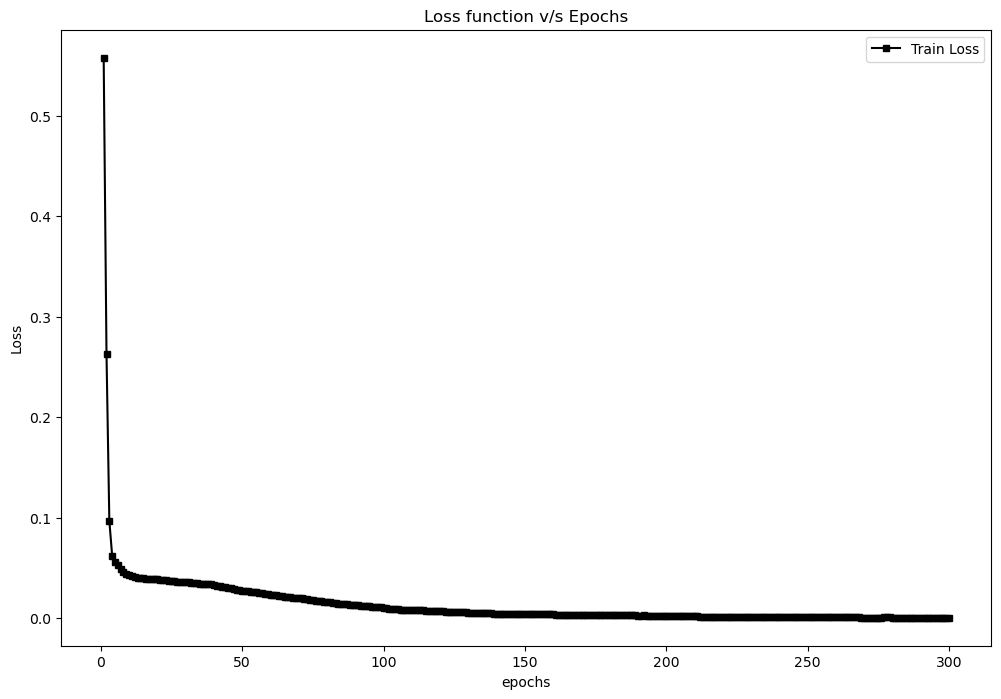

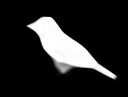

In [138]:
hidden_layers = [
    nn.Linear(2,32),
    nn.ReLU(),
    nn.Linear(32,64),
    nn.ReLU(),
    nn.Linear(64,128),
    nn.ReLU(),
    nn.Linear(128,128),
    nn.ReLU(),
    nn.Linear(128,1)
]

print()
print("-------------1D Solution--------------------")
print()


train_nn(hidden_layers)